Unit 5, Lecture 1
====

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, Feb 9 2016

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib

plt.style.use(['fivethirtyeight', '../../che116.mplstyle'])

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


IOError: '../../che116.mplstyle' not found in the style library and input is not a valid URL or path. See `style.available` for list of available styles.

Break Statements
====
Sometimes you may want to stop a `for` loop early. This may be done with a `break` statement:

In [2]:
#Iterate through my favorite pets
best_pets = ['fox', 'cat', 'dog', 'crow']
index = 0 #Keep track of the index
for pet in best_pets:
    print pet, index
    index += 1

fox 0
cat 1
dog 2
crow 3


In [9]:
#Now stop and report the dog index
best_pets = ['fox', 'cat', 'dog', 'crow']
index = 0
for pet in best_pets:
    if pet == 'dog':
        print 'The dog has index {}'.format(index)
        break
    index += 1
    
print best_pets[index]    

The dog has index 2
dog


Here's an example where we want to know when summing integers reaches 50

In [12]:
#Sum integers and stop when the sum is 50
ints = range(100)
isum = 0
for i in ints:
    isum += i
    if(isum > 50):
        break

print '{} was the integer that pushed us over 50'.format(i)

10 was the integer that pushed us over 50


While loops
====
Python loops are called `for-each` loops in most other programming languages. That's because they require a list or array to do a `for` loop. You may not always have an array handy, or you many not know how big the array will need to be. For example

In [16]:
#Sum integers and stop when the sum is 10000
ints = range(100)
isum = 0
for i in ints:
    isum += i
    if(isum > 10000):
        break

print '{} was the integer that pushed us to {}'.format(i, isum)

99 was the integer that pushed us to 4950


We needed to know before starting the loop how many integers to loop over!

We can get around this using a `while` loop

In [15]:
i = 0
isum = 0
while isum < 10000:
    isum += i
    i += 1
print '{} was the integer that pushed us to {}'.format(i, isum)

142 was the integer that pushed us to 10011


Computing Prediction Intervals
====

Now that we know how to `break` or use a `while` loop, we can return to the problem of computing prediction intervals. Consider our geometric distribution from yesterday:

$$P(n) = (1 - p)^{n - 1}p$$

Assuming $p=0.1$. Find $x$ such that:
$$ P(n < x) = 0.9$$

First, let's just sum to $1$ to make sure our code is correct

In [21]:
Q = range(1, 100)
p = 0.1
psum = 0
for n in Q:
    psum += (1 - p) ** (n - 1) * p
print psum

0.999970487335


Now we'll stop early, when we've reached the $0.9$ probability.

$$\sum_i^x P(i) > 0.9$$
$$\sum_i^x (1 - p)^{i - 1}p > 0.9$$

In [20]:
Q = range(1, 100)
p = 0.1
psum = 0
for n in Q:
    psum += (1 - p) ** (n - 1) * p
    if(psum > 0.9):
        break
print 'The number which pushed our sum over 0.9 is {}'.format(n)

The number which pushed our sum over 0.9 is 22


*With a prediction level of 90%, the number of trials is 22*

*The 90% prediction interval is [0,22]*

Defining Functions
----

Sometimes it's nice to use functions instead of writing the equation for a geometric distribution each time.

Function Definition
====

You may define your own functions using the `def` command.

In [31]:
def print_hello():
    print('Hello')

print_hello()

Hello


You may give arguments by putting them inside the `()`. Like this:

In [9]:
def print_string(s):
    print s # <--- I can now use s anywhere inside the function

print_string('Go dog')
print_string('See dog go')

Go dog
See dog go


What if you want to return something? You can, with the `return` function.

In [16]:
def square(x):
    return x * x

x_squared = square(2)
print x_squared

4


You can pass multple arguments and your function can be multiple lines, just like `for` loops and `if` statements.

In [4]:
def geometric(n, p):
    P_n = (1 - p)**(n - 1) * p
    return P_n 
geometric(5, 0.1)

0.06561

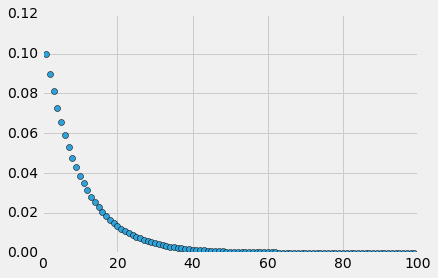

In [7]:
Q = np.arange(1,100)
plt.plot(Q, geometric(Q, 0.1), 'o')
plt.show()

Documenting Your Function
----

You can make your own documentation. Use the `'''` instead of just one `'` so that you can use multiple lines


In [45]:
def my_geom(n, p=0.5):
        '''This function will compute the probability of n from a geometric distribution given p
        
        Args:
            p: The probability of success
            n: The number of times before and including success
        returns: the probability'''
        return (1 - p)**(n - 1)* p

In [46]:
help(my_geom)

Help on function my_geom in module __main__:

my_geom(n, p=0.5)
    This function will compute the probability of n from a geometric distribution given p
    
    Args:
        p: The probability of success
        n: The number of times before and including success
    returns: the probability



Notice I used a default value for `p`

In [48]:
my_geom(n=4)

0.0625

Scipy Stats
----

There is a library, that we will gradually begin to use, that has all distributions and utilities for prediction intervals. Use it sparingly until you understand the concepts well

In [6]:
#geometric probability of 5 with p=0.2
p = 0.2
n = 5
(1 - p )**(n - 1) * p

0.08192000000000002

In [9]:
from scipy import stats as ss

ss.geom.pmf(5, p=0.1)

0.065610000000000002

You can plot, since this is a `numpy` supporting library

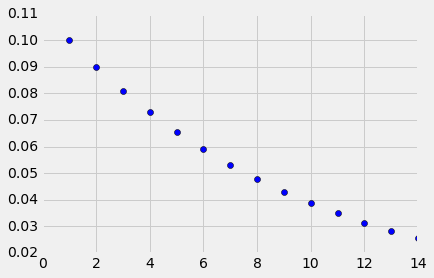

In [10]:
n = np.arange(1,15)
pn = ss.geom.pmf(n, p=0.1)
plt.plot(n, pn, 'bo')
plt.show()

Scipy stats has all the cumulative distributions as well.

In [11]:
#amount of probability between n=1 (inc) and n=22
ss.geom.cdf(22, p=0.1)

0.90152290978163885

Finally, there is a function to ask about prediction intervals.

In [12]:
#what should the rv for the cdf be a certain number?

In [13]:
ss.geom.ppf(0.9, p=0.1)

22.0

For now, I will have you use scipy stats to check your work. You may not use it on homework unless specified

One note about scipy stats is that you need to visit the documentation website to get complete function help. The docstrings often don't provide enough info.

Sampling from Discrete Distributions
===

Sampling is the process of creating synthetic data from a known distribution. This is part of the art of creating random numbers, which we don't have time to cover in depth. We're going to used canned-functions to generate our samples, but check Unit_5_Lecture_1 from last year to see how it works

In [15]:
ss.geom.rvs(p=0.2)

4

In [16]:
for i in range(10):
    print(ss.geom.rvs(p=0.2))

1
4
8
16
11
2
6
4
6
4


You can quickly generate many random variables by saying how many you'd like

In [19]:
ss.geom.rvs(size=5, p=0.5)

array([2, 1, 3, 3, 4])

Histogramming
---

You can `recover` a probability distribution from data using the histogram function. Histograms are counts of how many time you see an element in a sample space. Since counts are proportional to probability, this gives you a graph of the probability distribution.

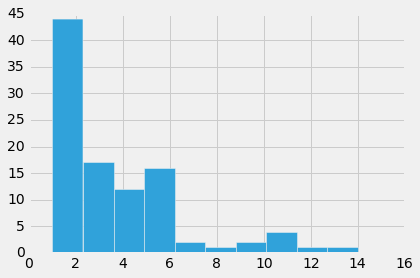

In [20]:
data = ss.geom.rvs(size=100, p=0.3)
plt.hist(data)
plt.show()

Let's compare with what we know the geometric distribution should look like

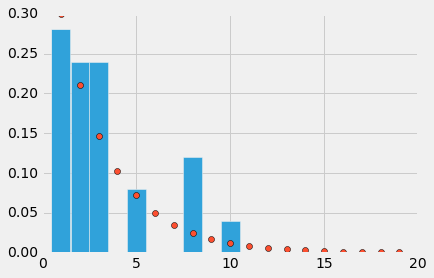

In [21]:
x = np.arange(1,20)
p = 0.3
px = (1 - p)**(x - 1) * p

data = ss.geom.rvs(size=25, p=p) 
# notice p = p  means the p argument is set to the p variable

plt.hist(data, normed=True, align='left')
#normed makes it so the counts are divided by total counts
#align makes it so the center of the bars falls along the x-labels

plt.plot(x, px, 'o')

plt.show()

The two don't quite line up. It's because we don't have enough samples. Let's try to generate more!

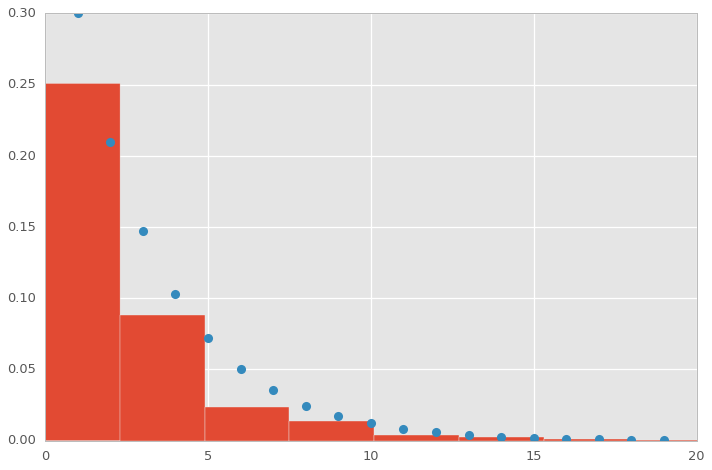

In [74]:
data = ss.geom.rvs(size=10000, p=p) 

plt.hist(data, normed=True, align='left')
plt.plot(x, px, 'o')

plt.xlim(0, 10)

plt.show()

Still not quite there! Notice the bars are too fat. It's becuase the histogram has reduced the sample space to be 0, 2.5, 5, 7.5 ,etc.

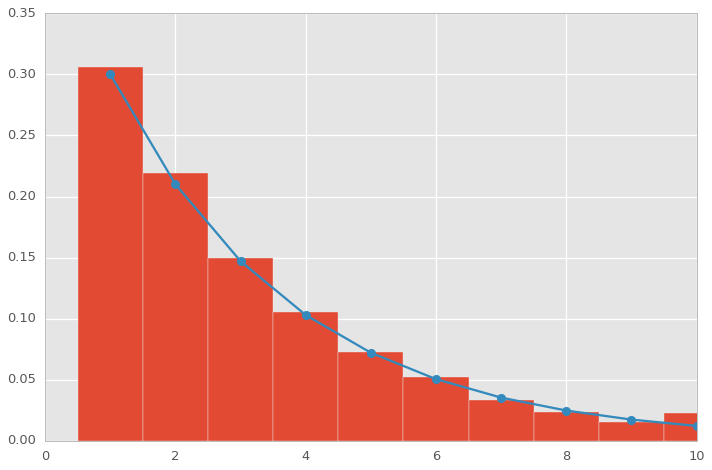

In [82]:
data = ss.geom.rvs(size=10000, p=p) 

plt.hist(data, normed=True, align='left', bins=np.arange(0,12))
plt.plot(x, px, '-o')

plt.xlim(0, 10)

plt.show()

Thinking exercise: why is the last bar so big??

In [88]:
data = ss.binom.rvs(size=1000, p=0.5, n=10)

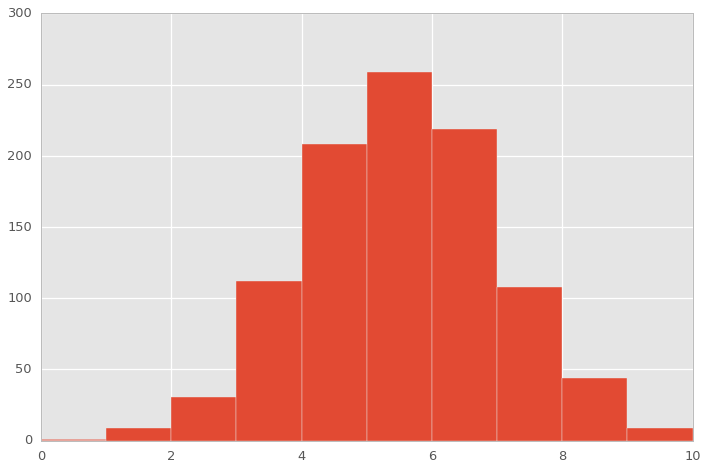

In [90]:
plt.hist(data, bins=np.arange(0,11))
plt.show()

How does histogram work? We can print out it's output to find out

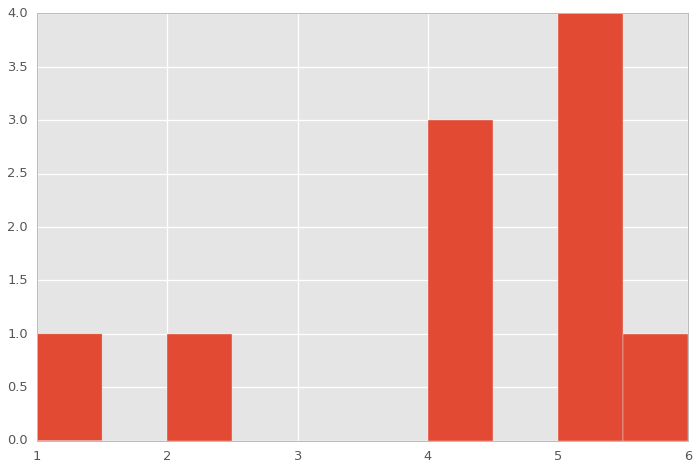

In [91]:
data = ss.binom.rvs(size=10, p=0.5, n=10)
info = plt.hist(data)
plt.show()

In [92]:
print(data)

[4 5 1 5 4 6 5 2 5 4]


In [94]:
type(info)

tuple

In [98]:
info[0] #how many things are in each bin

array([ 1.,  0.,  1.,  0.,  0.,  0.,  3.,  0.,  4.,  1.])

In [97]:
info[1] #the bins

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ])

What if you want that without making the graph?

In [101]:
output_tuple = np.histogram(data)
print(output_tuple)

(array([1, 0, 1, 0, 0, 0, 3, 0, 4, 1]), array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ]))


Magic trick

In [116]:
counts, bins = np.histogram(data)

print(bins)
print(counts)
print(data)

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6. ]
[1 0 1 0 0 0 3 0 4 1]
[4 5 1 5 4 6 5 2 5 4]


Now what if you want to plot the results from that? Use barplot. You have to think carefully about what to use for your left edge

<Container object of 10 artists>

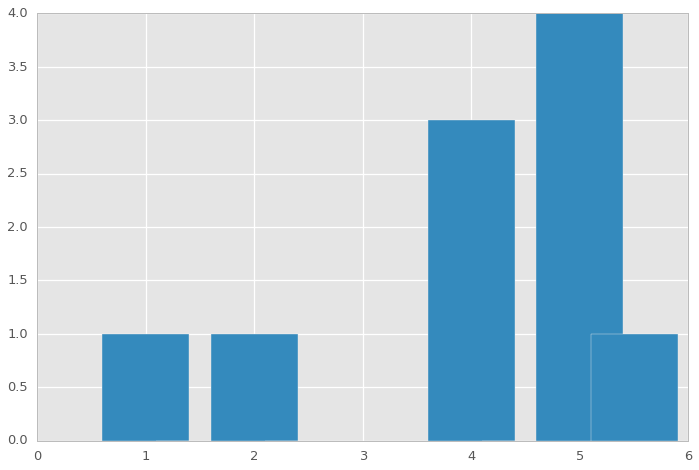

In [115]:
plt.bar(left=bins[:-1], height=counts, align='center')

Huh, what is that funny problem on the right? It's because our bin boundaries are bad - we ended comparing floating point numbers. Best to always specify the bins we want

In [119]:
np.arange(-0.5, 10.5, 1)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

In [117]:
counts, bins = np.histogram(data, bins=np.arange(-0.5, 10.5, 1))

<Container object of 10 artists>

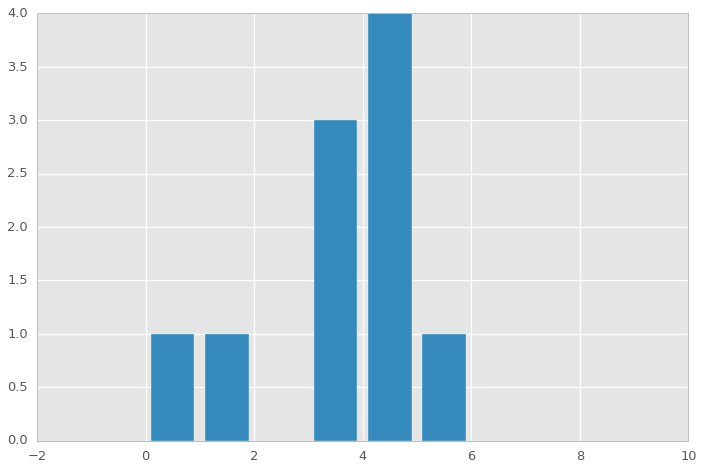

In [118]:
plt.bar(left=bins[:-1], height=counts, align='center')